In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("blackFriday.csv")

In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [7]:
df.index

RangeIndex(start=0, stop=550068, step=1)

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
#Kolon isimlerini turkcelestirdik
df.rename(columns={"User_ID":"UserID","Product_ID":"ProductID","Gender":"Cinsiyet","Age":"Yas","Occupation":"Meslek","City_Category":"Sehir","Stay_In_Current_City_Years":"Sehir_Yili","Marital_Status":"Medeni_Hal","Product_Category_1":"Urun1","Product_Category_2":"Urun2","Product_Category_3":"Urun3"},inplace=True)

In [10]:
df.head(1)

,UserID,ProductID,Cinsiyet,Yas,Meslek,Sehir,Sehir_Yili,Medeni_Hal,Urun1,Urun2,Urun3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370


In [11]:
df.isnull().sum()

UserID             0
ProductID          0
Cinsiyet           0
Yas                0
Meslek             0
Sehir              0
Sehir_Yili         0
Medeni_Hal         0
Urun1              0
Urun2         173638
Urun3         383247
Purchase           0
dtype: int64

In [12]:
# toplam bos deger sayisi
df.isnull().sum().sum()

556885

In [13]:
df.head(1)

,UserID,ProductID,Cinsiyet,Yas,Meslek,Sehir,Sehir_Yili,Medeni_Hal,Urun1,Urun2,Urun3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370


In [14]:
# Nan degerleri 0 ile doldurduk
df.fillna(0, inplace = True)
df.Urun2.unique()

array([ 0.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [15]:
df.isnull().sum()

UserID        0
ProductID     0
Cinsiyet      0
Yas           0
Meslek        0
Sehir         0
Sehir_Yili    0
Medeni_Hal    0
Urun1         0
Urun2         0
Urun3         0
Purchase      0
dtype: int64

In [16]:
# tekrar eden deger var mı
print(df.duplicated())
df.duplicated().sum()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool


0

In [17]:
df.drop(["ProductID"],inplace=True,axis="columns")

In [18]:
df.head(1)

,UserID,Cinsiyet,Yas,Meslek,Sehir,Sehir_Yili,Medeni_Hal,Urun1,Urun2,Urun3,Purchase
0,1000001,F,0-17,10,A,2,0,3,0.0,0.0,8370


In [19]:
df["Sehir_Yili"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
# Sehir_Yili kolonundaki verilerin tipini integer yaptık ve "+" ifadesini kaldırdık
def yıl(deger):
    if "+" in deger:
        deger=deger.replace("+","")
        return int(deger)
    else:
        return int(deger)
df["Sehir_Yili"]=df["Sehir_Yili"].apply(yıl)

In [21]:
df['Cinsiyet'].unique()

array(['F', 'M'], dtype=object)

In [22]:
df["Yas"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [23]:
def yas_aralik(deger):
    if "0-17" in deger:
        deger = deger.replace("0-17","cocuk")
        return str(deger)
    elif "18-25" in deger:
        deger = deger.replace("18-25","ergen")
        return str(deger)
    elif "26-35" in deger:
        deger = deger.replace("26-35","yetisgin")
        return str(deger)
    elif "36-45" in deger:
        deger = deger.replace("36-45","yetisgin")
        return str(deger)
    elif "46-50" in deger:
        deger = deger.replace("46-50","yetisgin")
        return str(deger)
    elif "51-55" in deger:
        deger = deger.replace("51-55","yasli")
        return str(deger)
    else:
        deger = deger.replace("55+","yasli")
        return str(deger)
df["Yas"]=df["Yas"].apply(yas_aralik)

In [24]:
df["Yas"].unique()

array(['cocuk', 'yasli', 'yetisgin', 'ergen'], dtype=object)

In [25]:
df

,UserID,Cinsiyet,Yas,Meslek,Sehir,Sehir_Yili,Medeni_Hal,Urun1,Urun2,Urun3,Purchase
0,1000001,F,cocuk,10,A,2,0,3,0.0,0.0,8370
1,1000001,F,cocuk,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,cocuk,10,A,2,0,12,0.0,0.0,1422
3,1000001,F,cocuk,10,A,2,0,12,14.0,0.0,1057
4,1000002,M,yasli,16,C,4,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,M,yasli,13,B,1,1,20,0.0,0.0,368
550064,1006035,F,yetisgin,1,C,3,0,20,0.0,0.0,371
550065,1006036,F,yetisgin,15,B,4,1,20,0.0,0.0,137
550066,1006038,F,yasli,1,C,2,0,20,0.0,0.0,365


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   UserID      550068 non-null  int64  
 1   Cinsiyet    550068 non-null  object 
 2   Yas         550068 non-null  object 
 3   Meslek      550068 non-null  int64  
 4   Sehir       550068 non-null  object 
 5   Sehir_Yili  550068 non-null  int64  
 6   Medeni_Hal  550068 non-null  int64  
 7   Urun1       550068 non-null  int64  
 8   Urun2       550068 non-null  float64
 9   Urun3       550068 non-null  float64
 10  Purchase    550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [27]:
# Aykiri deger var mi 
aykiri = []

def bul(veri):
    sinir = 3 # deger ancak 3 standart sapma uzaginda olabilir
    ort = np.mean(veri)
    std = np.std(veri)
    
    for i in veri:
        standartlastirma = (i-ort)/std
        if np.abs(standartlastirma)>sinir:
            aykiri.append(i)
        return aykiri
    
bul(df["Purchase"])

[]

<AxesSubplot: xlabel='Purchase'>

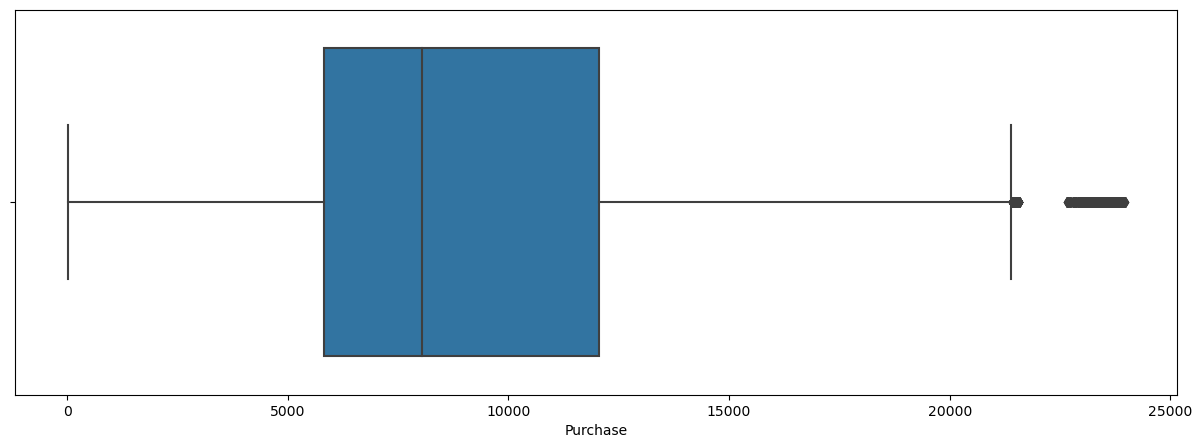

In [28]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Purchase",data=df)

In [29]:
df.columns

Index(['UserID', 'Cinsiyet', 'Yas', 'Meslek', 'Sehir', 'Sehir_Yili',
       'Medeni_Hal', 'Urun1', 'Urun2', 'Urun3', 'Purchase'],
      dtype='object')

,Sehir
Sehir,
A,147720
B,231173
C,171175


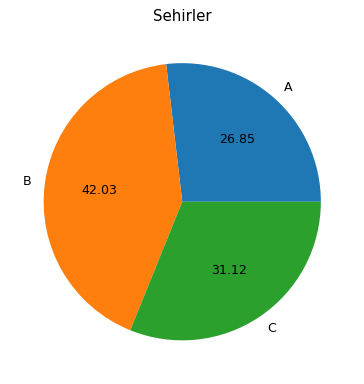

In [30]:
plt.figure(figsize=(5,5),dpi=90)
plt.title("Sehirler")
grup=df.groupby("Sehir")["Sehir"].agg("count")
display(grup.to_frame())
plt.pie(grup,labels=grup.index,autopct="%0.2f")
plt.show()

<AxesSubplot: xlabel='Yas', ylabel='count'>

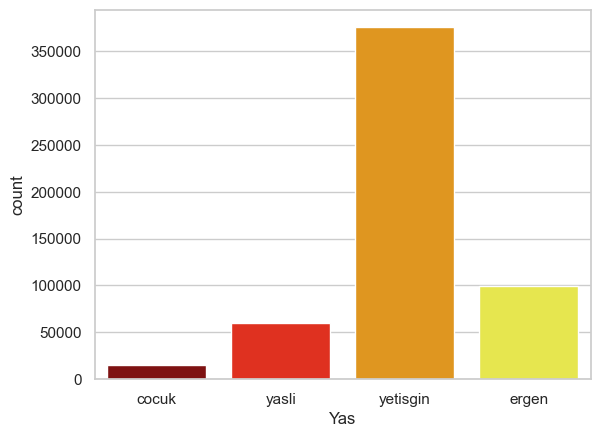

In [31]:
sns.set_theme(style="whitegrid")
sns.countplot(x="Yas",data=df,palette="hot")

<AxesSubplot: xlabel='Urun1', ylabel='count'>

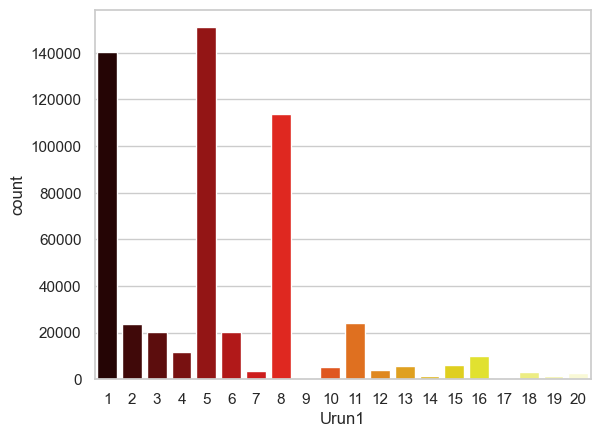

In [32]:
sns.countplot(x="Urun1",data=df,palette="hot")

<AxesSubplot: xlabel='Urun2', ylabel='count'>

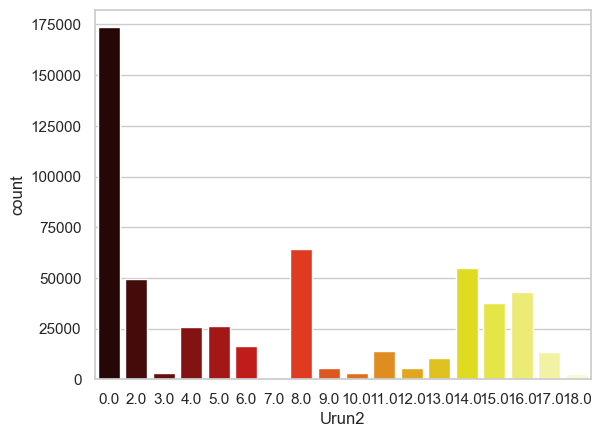

In [33]:
sns.countplot(x="Urun2",data=df,palette="hot")

<AxesSubplot: xlabel='Urun3', ylabel='count'>

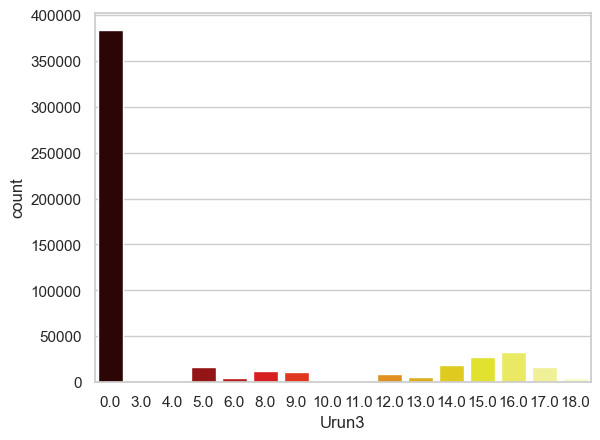

In [34]:
sns.countplot(x="Urun3",data=df,palette="hot")

Text(0.5, 1.0, 'Harcanan Miktarin Dagilimi')

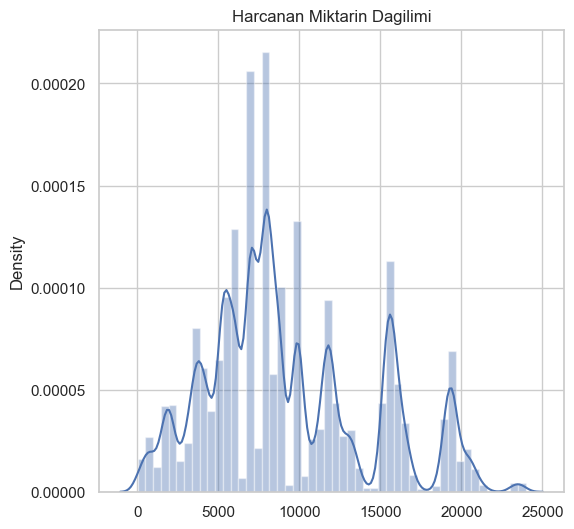

In [35]:
fig, axes = plt.subplots(nrows=1,ncols=1 ,figsize=(6,6))

sns.distplot(x=df["Purchase"])
axes.set_title("Harcanan Miktarin Dagilimi")

<AxesSubplot: >

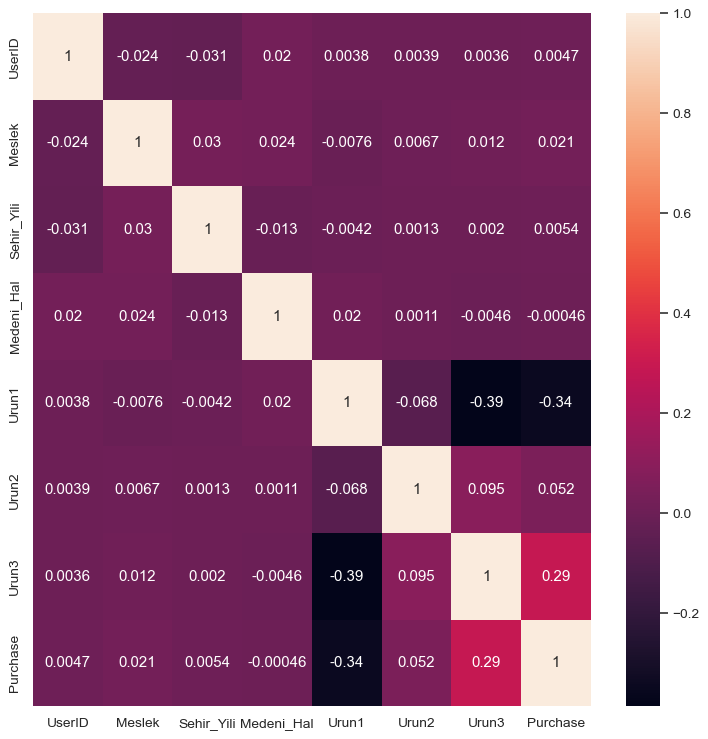

In [36]:
plt.figure(figsize=(10,10),dpi=90)
corr = df.corr()
sns.heatmap(corr,annot=True)

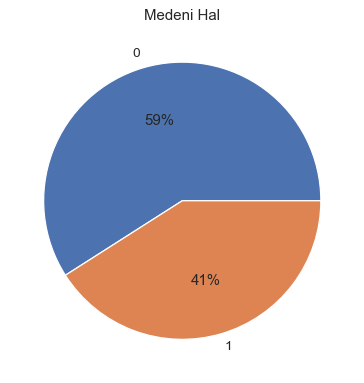

In [37]:
data = df["Medeni_Hal"].value_counts()
labels = df["Medeni_Hal"].unique()
plt.figure(figsize=(5,5),dpi=90)
plt.title("Medeni Hal")
plt.pie(data,labels=labels,autopct="%.0f%%")
plt.show()

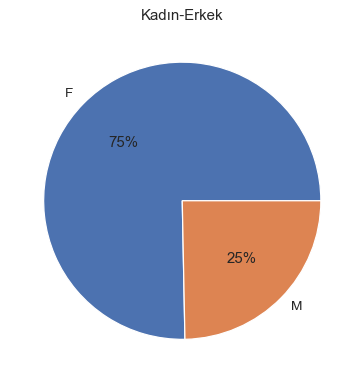

In [38]:
data = df["Cinsiyet"].value_counts()
labels = df["Cinsiyet"].unique()
plt.figure(figsize=(5,5),dpi=90)
plt.title("Kadın-Erkek")
plt.pie(data,labels=labels,autopct="%.0f%%")
plt.show()